## Notebook Imports and Packages

In [153]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sympy import symbols,diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Example 1

### $f(x) = x^2 + x + 1$

In [54]:
def f(x):
    return x**2 + x + 1

In [55]:
#Make Data
x_1 = np.linspace(start=-3,stop=3,num=500)

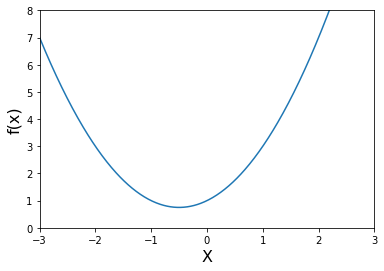

In [56]:
#Plot
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X',fontsize = 16)
plt.ylabel('f(x)',fontsize = 16)
plt.plot(x_1,f(x_1))
plt.show()

## Slopes and Derivatives
Create a python function for the derivative of $f(x)$ called $df(x)$

In [57]:
def df(x):
    return 2*x + 1

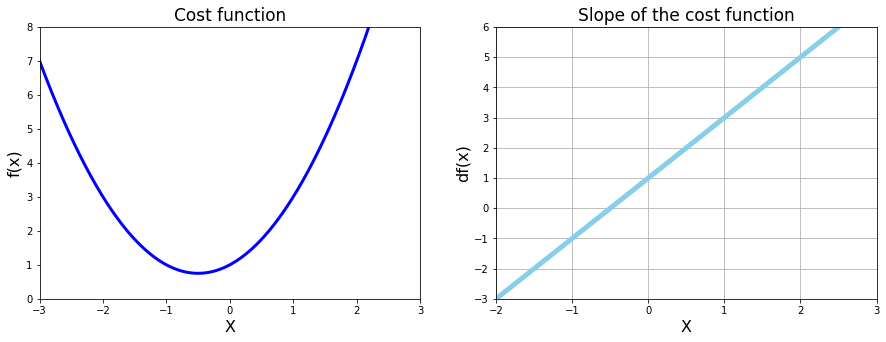

In [58]:
#Plot function and derivative side by side

plt.figure(figsize=[15,5])
#1 Chart: Cost function
plt.subplot(1,2,1)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.title('Cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('f(x)',fontsize = 16)
plt.plot(x_1,f(x_1),color='blue',linewidth=3)

#2 Chart: Derivative function
plt.subplot(1,2,2)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('df(x)',fontsize = 16)
plt.grid()
plt.plot(x_1,df(x_1),color='skyblue',linewidth=5)

plt.show()

## Python Loops and Gradient Descent

In [59]:
# Python For Loop
for i in range(3):
    print('Hello World', i)
print('End of loop')

Hello World 0
Hello World 1
Hello World 2
End of loop


In [60]:
# Python While Loop
counter = 0
while counter < 5:
    print('Counting...',counter)
    counter=counter+1
print('Ready or not, Here I come')

Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
Ready or not, Here I come


In [61]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list=[new_x]
slope_list=[df(new_x)]

for n in range(100):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size < precision:
        print('Loop run', n ,'times')
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is', df(new_x))
print('f(x) value or Cost at this point is', f(new_x))

Loop run 50 times
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is 7.992587079153068e-05
f(x) value or Cost at this point is 0.7500000015970362


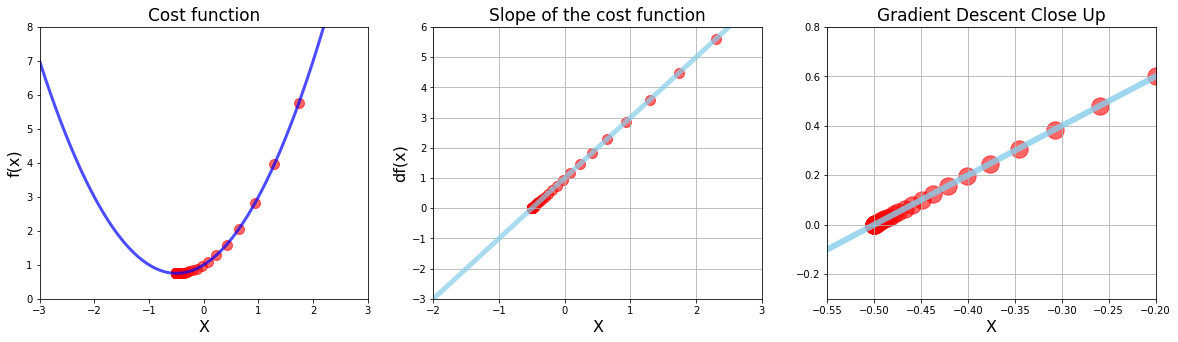

In [62]:
#Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20,5])
#1 Chart: Cost function
plt.subplot(1,3,1)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.title('Cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('f(x)',fontsize = 16)
plt.plot(x_1,f(x_1),color='blue',linewidth=3,alpha=0.7)

values=np.array(x_list)
plt.scatter(x_list,f(values),color='red',s=100,alpha=0.6)

#2 Chart: Derivative function
plt.subplot(1,3,2)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('df(x)',fontsize = 16)
plt.grid()
plt.plot(x_1,df(x_1),color='skyblue',linewidth=5,alpha=0.7)

plt.scatter(x_list,slope_list,color='red',s=100,alpha=0.6)

#3 Chart: Gradient Descent Close up
plt.subplot(1,3,3)
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.title('Gradient Descent Close Up', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.grid()
plt.plot(x_1,df(x_1),color='skyblue',linewidth=6,alpha=0.8)

plt.scatter(x_list,slope_list,color='red',s=300,alpha=0.6)
plt.show()

### Example 2 - Multiple minima vs Initial Guess & Advanced functions
### $$g(x) = x^4 - 4x^2 + 5$$

In [63]:
#Make Some Data
x_2=np.linspace(-2,2,1000)

#g(x) function and dg(x)function in Python
def g(x):
    return x**4 - 4*x**2 +5

def dg(x):
    return 4*x**3 - 8*x

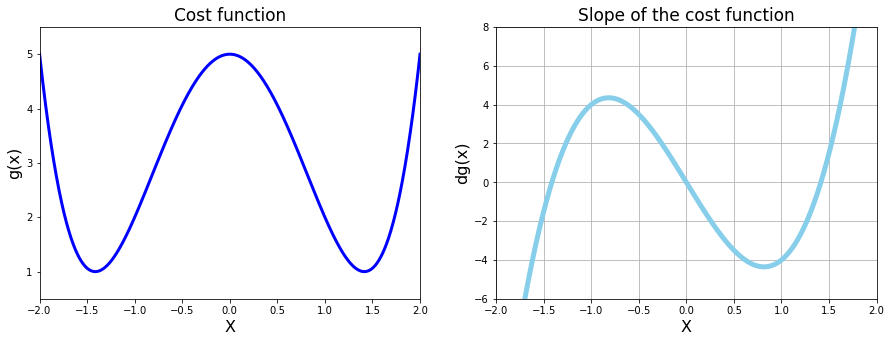

In [64]:
#Plot function and derivative side by side

plt.figure(figsize=[15,5])
#1 Chart: Cost function
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('g(x)',fontsize = 16)
plt.plot(x_2,g(x_2),color='blue',linewidth=3)

#2 Chart: Derivative function
plt.subplot(1,2,2)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('dg(x)',fontsize = 16)
plt.grid()
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [65]:
def gradient_descent(derivative_func,initial_guess,multiplier=0.02,precision=0.001,max_iter=300):
  # ctrl+] (windows)  
  # cmd +] (mac) Group Indentation
    new_x = initial_guess
    x_list=[new_x]
    slope_list=[derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x,x_list,slope_list


In [66]:
local_min,list_x,deriv_list = gradient_descent(derivative_func = dg, initial_guess=-0.1)
print('Local min occurs at:', local_min)
print('Number of steps:',len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


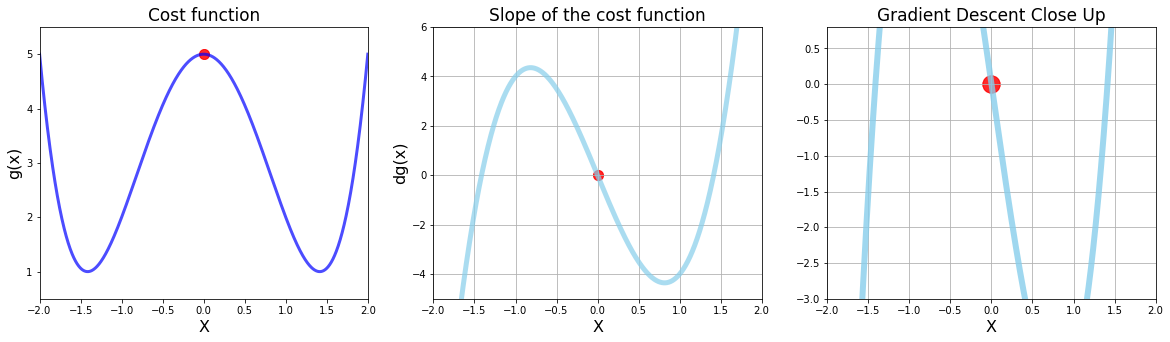

In [67]:
#Calling gradient descent function
local_min,list_x,deriv_list = gradient_descent(derivative_func = dg, initial_guess=0)

#Plot function,derivative and scatter plot side by side

plt.figure(figsize=[20,5])
#1 Chart: Cost function
plt.subplot(1,3,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('g(x)',fontsize = 16)
plt.plot(x_2,g(x_2),color='blue',linewidth=3,alpha=0.7)
plt.scatter(list_x,g(np.array(list_x)),color='red',s=100,alpha=0.6)

#2 Chart: Derivative function
plt.subplot(1,3,2)
plt.xlim(-2,2)
plt.ylim(-5,6)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('dg(x)',fontsize = 16)
plt.grid()
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=5,alpha=0.7)

plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.6)

#3 Chart: Gradient Descent Close up
plt.subplot(1,3,3)
plt.xlim(-2,2)
plt.ylim(-3,0.8)
plt.title('Gradient Descent Close Up', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.grid()
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=6,alpha=0.8)

plt.scatter(list_x,deriv_list,color='red',s=300,alpha=0.6)
plt.show()

## Divergence, Overflow and Python Tuples
### $$h(x)=x^5-2x^4+2$$

In [68]:
#Make Some Data
x_3= np.linspace(start=-2.5,stop=2.5,num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

Local min occurs at: 1.5989534547394717
Cost at this minimum is:  -0.6214287992331258
Number of steps: 117


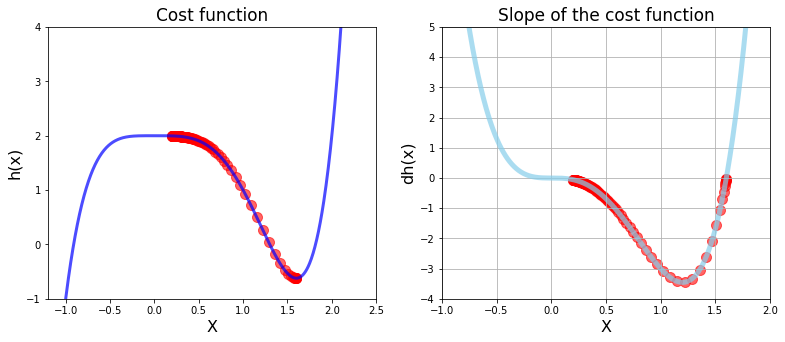

In [69]:
#Calling gradient descent function
local_min,list_x,deriv_list = gradient_descent(derivative_func = dh, initial_guess=0.2)

#Plot function,derivative and scatter plot side by side

plt.figure(figsize=[20,5])
#1 Chart: Cost function
plt.subplot(1,3,1)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.title('Cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('h(x)',fontsize = 16)
plt.plot(x_3,h(x_3),color='blue',linewidth=3,alpha=0.7)
plt.scatter(list_x,h(np.array(list_x)),color='red',s=100,alpha=0.6)

#2 Chart: Derivative function
plt.subplot(1,3,2)
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('dh(x)',fontsize = 16)
plt.grid()
plt.plot(x_3,dh(x_3),color='skyblue',linewidth=5,alpha=0.7)

plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.6)
print('Local min occurs at:', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps:',len(list_x))

In [70]:
import sys
sys.float_info.max

1.7976931348623157e+308

#### Python Tuples

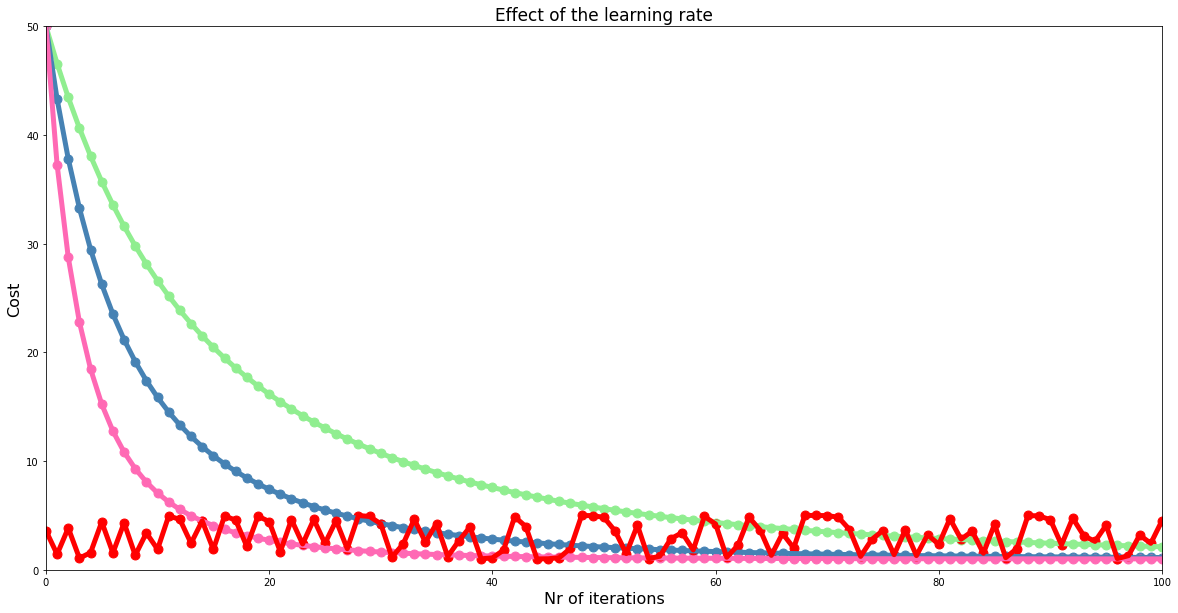

In [71]:
# Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)

# Challenge: Plot two more learning rates: mid_gamma (0.001) and high_gamma(0.002)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.25, precision=0.0001, max_iter=n)



# Plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting low learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

# Plotting low learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

# Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)

plt.show()

## DataViz with 3D Charts

### Example 4 Minimise $$f(x,y)= \frac{1}{3^{-x^2-y^2}+1}$$

Minimise $$f(x,y)= \frac{1}{r+1}$$ where $r$ is $3^{-x^2-y^2}$

In [72]:
def f(x,y):
    r = 3**(-x**2-y**2)
    return 1 / (r+1)

In [73]:
#Make our x and y data
x_4=np.linspace(start=-2,stop=2,num=200)
y_4=np.linspace(start=-2,stop=2,num=200)

print('Shape of X arrary', x_4.shape)

x_4,y_4 = np.meshgrid(x_4,y_4)
print('After meshgrid',x_4.shape)

Shape of X arrary (200,)
After meshgrid (200, 200)


/var/folders/05/y2f2pj2562lbrlnpn54k12ww0000gp/T/ipykernel_11338/2727705469.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


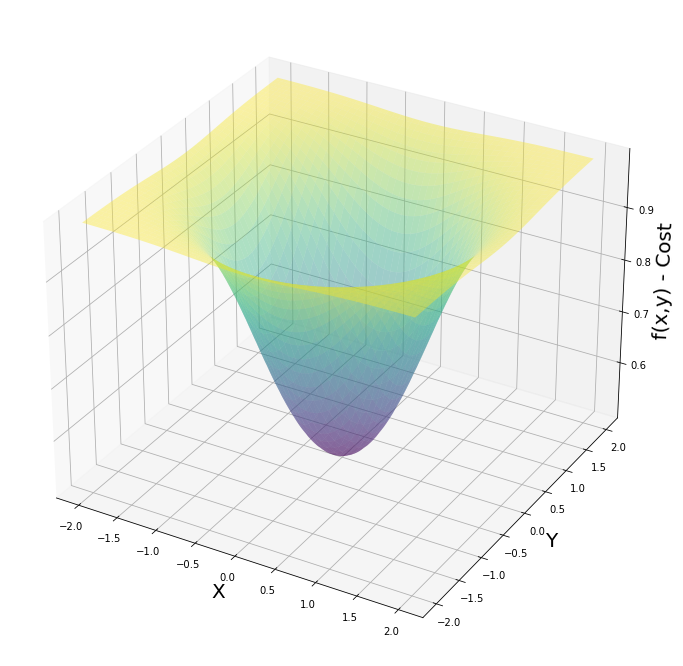

In [74]:
#Generating 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X',fontsize =20)
ax.set_ylabel('Y',fontsize =20)
ax.set_zlabel('f(x,y) - Cost',fontsize =20)

ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap = cm.viridis , alpha=0.4) #plotsurface changed to 'plot_surface'
plt.show()

## Partial Derivatives & Symbolic Computation 

## $$\frac{\partial f}{\partial x} = \frac {2x \ln(3) \cdot 3^{-x^2-y^2}}{\left(3^{-x^2-y^2}+1\right)^2}$$
## $$\frac{\partial f}{\partial y} = \frac {2y \ln(3) \cdot 3^{-x^2-y^2}}{\left(3^{-x^2-y^2}+1\right)^2}$$

In [75]:
a,b = symbols('x,y')
print('Our cost function f(x,y) is:', f(a,b))
print('Partial derative wrt x is:',diff(f(a,b),a))
print('Value f(x,y) at x=1.8 and y=1.0 is:', f(a,b).evalf(subs={a:1.8,b:1.0}))
print('Value partial derative wrt x isat x=1.8 and y=1.0 is:', diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))

Our cost function f(x,y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derative wrt x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value f(x,y) at x=1.8 and y=1.0 is: 0.990604794032582
Value partial derative wrt x isat x=1.8 and y=1.0 is: 0.0368089716197505


## Batch Gradient Descent with Sympy

In [76]:
#Set Up
multiplier = 0.1
max_iter = 200
params = np.array([1.8,1.0])

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
    
#Result
print('Values in gradient array', gradients)
print('Minimum occurs at x values of', params[0])
print('Minimum occurs at y values of', params[1])
print('The cost is', f(params[0],params[1]))

Values in gradient array [0.000461440542096373 0.000256355856720208]
Minimum occurs at x values of 0.000793898510134722
Minimum occurs at y values of 0.000441054727852623
The cost is 0.500000226534985


In [77]:
def fpx(x,y):
    r = 3**(-x**2 - y**2)
    return 2*r*x*log(3)/(r + 1)**2
def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*r*y*log(3)/(r + 1)**2

In [85]:
#Set Up
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0])

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
    
#Result
print('Values in gradient array', gradients)
print('Minimum occurs at x values of', params[0])
print('Minimum occurs at y values of', params[1])
print('The cost is', f(params[0],params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x values of 3.458385998858304e-11
Minimum occurs at y values of 1.9213255549212797e-11
The cost is 0.5


## Graphing 3D Gradient Descent & Advanced Numpy Arrarys

In [95]:
#Set Up
multiplier = 0.1
max_iter = 200
params = np.array([[1.8,1.0]])
values_array = params
print (params.shape)
for n in range(max_iter):
    gradient_x = fpx(params[0][0],params[0][1])
    gradient_y = fpy(params[0][0],params[0][1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array,params,axis=0)
#Result
print('Values in gradient array', gradients)
print('Minimum occurs at x values of', params[0][0])
print('Minimum occurs at y values of', params[0][1])
print('The cost is', f(params[0][0],params[0][1]))

(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x values of 0.0007938985101347202
Minimum occurs at y values of 0.0004410547278526219
The cost is 0.5000002265349848


In [88]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]  :', hs_band[0])
print('hs_band[0][1]   :', hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

print('Printing nicknames...', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles ...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0]  : ['Black Thought' 'MC']
hs_band[0][1]   : Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing band roles ... ['MC' 'Drums' 'Guitar' 'MC']


/var/folders/05/y2f2pj2562lbrlnpn54k12ww0000gp/T/ipykernel_11338/409215740.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


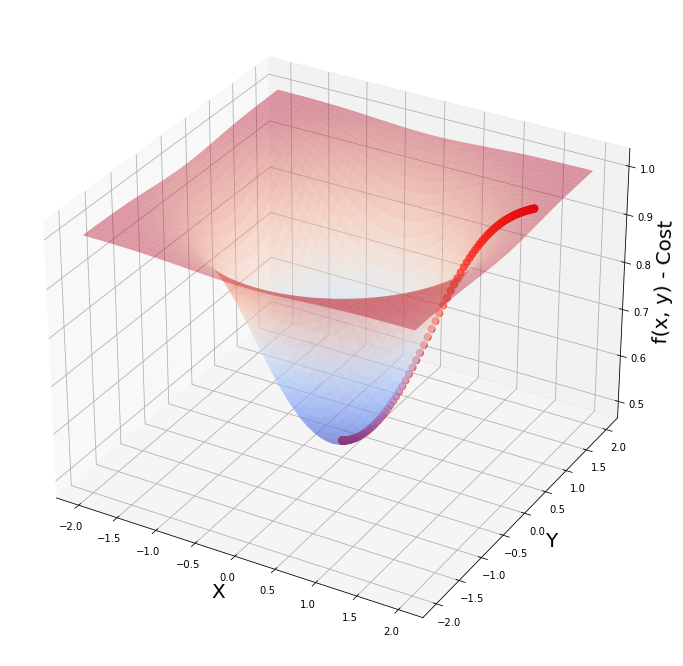

In [96]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], 
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

# Working with Data & a Real Cost Function

## Example - 5 Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [107]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [109]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


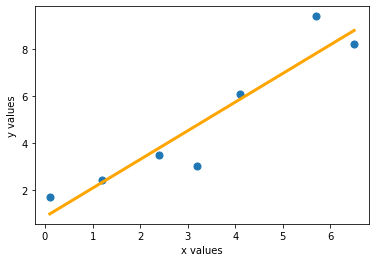

In [115]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [131]:
#y_hat = theta 0 + theta 1 * x
y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5
y_hat

array([[0.96980779],
       [2.31480691],
       [3.78207866],
       [4.76025983],
       [5.86071365],
       [7.81707599],
       [8.79525716]])

In [148]:
def MSE(x): #my code
    #n= len(x)
    #y_hat = 0.8475351486029536 + 1.2227264637835915 * x
    return (1/x.size)*sum((x - y_hat)**2)

In [138]:
def mse(y,y_hat):# phillipe's code
    return (1/y.size)*sum((y - y_hat)**2)

In [149]:
MSE(x_5)

array([2.74203442])

In [157]:
print('Manually calculated:', MSE(y_5))
print('Scikitlearn func:',mean_squared_error(y_5,y_hat))

Manually calculated: [0.94796558]
Scikitlearn func: 0.9479655759794577


In [140]:
mse(x_5,y_hat)

array([2.74203442])

In [141]:
mse(y_5,y_hat)

array([0.94796558])

## 3D Plot for MSE Cost Function

In [176]:
#make data for thetas
nr_th=200
th_0 = np.linspace(start=-1,stop=3,num=nr_th)
th_1 = np.linspace(start=-1,stop=3,num=nr_th)
plot_t0,plot_t1 = np.meshgrid(th_0,th_1)
plot_t0.shape

(200, 200)

In [177]:
plot_cost = np.zeros((nr_th,nr_th))

for i in range(nr_th):
    for j in range(nr_th):
        #print (plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = MSE(y_5)
        
plot_cost

array([[108.51285714, 108.14283763, 107.77362617, ...,  51.2194266 ,
         51.00859498,  50.79857143],
       [106.88158925, 106.51424787, 106.14771456, ...,  50.11575289,
         49.90759941,  49.700254  ],
       [105.262904  , 104.89824077, 104.5343856 , ...,  49.02466182,
         48.81918649,  48.61451922],
       ...,
       [ 30.0738157 ,  30.23139037,  30.38977309, ...,  76.71643873,
         77.03320129,  77.35077191],
       [ 30.92133081,  31.08158362,  31.24264449, ...,  78.09154801,
         78.41098872,  78.73123749],
       [ 31.78142857,  31.94435952,  32.10809853, ...,  79.47923995,
         79.8013588 ,  80.12428571]])

In [162]:
#Nested loop practice
for i in range(3):
    for j in range(3):
        print(f'value of i is {i} and value of j is {j}')

value of i is 0 and value of j is 0
value of i is 0 and value of j is 1
value of i is 0 and value of j is 2
value of i is 1 and value of j is 0
value of i is 1 and value of j is 1
value of i is 1 and value of j is 2
value of i is 2 and value of j is 0
value of i is 2 and value of j is 1
value of i is 2 and value of j is 2


/var/folders/05/y2f2pj2562lbrlnpn54k12ww0000gp/T/ipykernel_11338/2351591752.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca (projection ='3d')


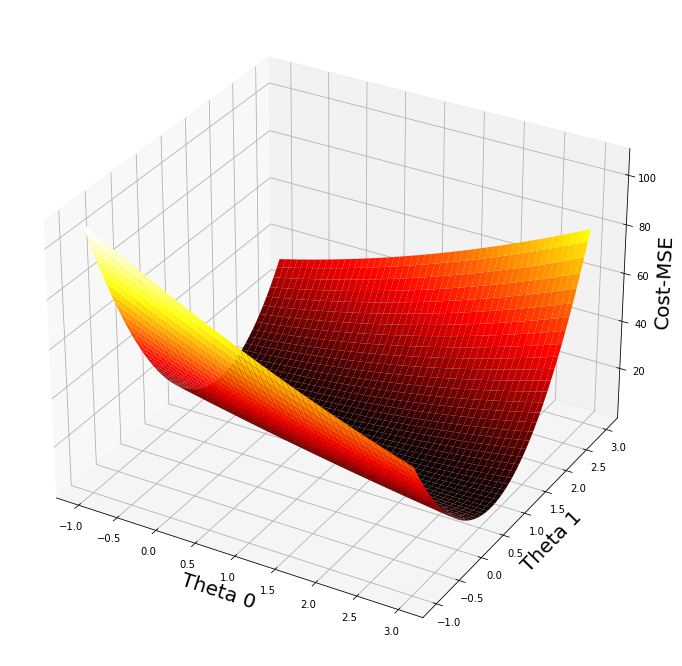

In [179]:
# Plotting MSE
fig = plt.figure(figsize = [16,12])
ax = fig.gca (projection ='3d')

ax.set_xlabel('Theta 0',fontsize = 20) 
ax.set_ylabel('Theta 1',fontsize = 20) 
ax.set_zlabel('Cost-MSE',fontsize = 20) 

ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.hot)
plt.show()

In [186]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape) #dims changed to shape
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747163
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of the MSE w.r.t $\theta_0$ and $\theta_1$
## $$\frac {\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} -\theta_0 - \theta_1 x^{(i)}\big)$$

## $$\frac {\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} -\theta_0 - \theta_1 x^{(i)}\big)\big(x^{(i)}\big)$$

In [187]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    
    theta0_slope = (-2/n) * sum(y- thetas[0] - thetas[1] * x)
    theta1_slope = (-2/n) * sum((y- thetas[0] - thetas[1] * x)*x)

#return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [188]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


/var/folders/05/y2f2pj2562lbrlnpn54k12ww0000gp/T/ipykernel_11338/3641408366.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca (projection ='3d')


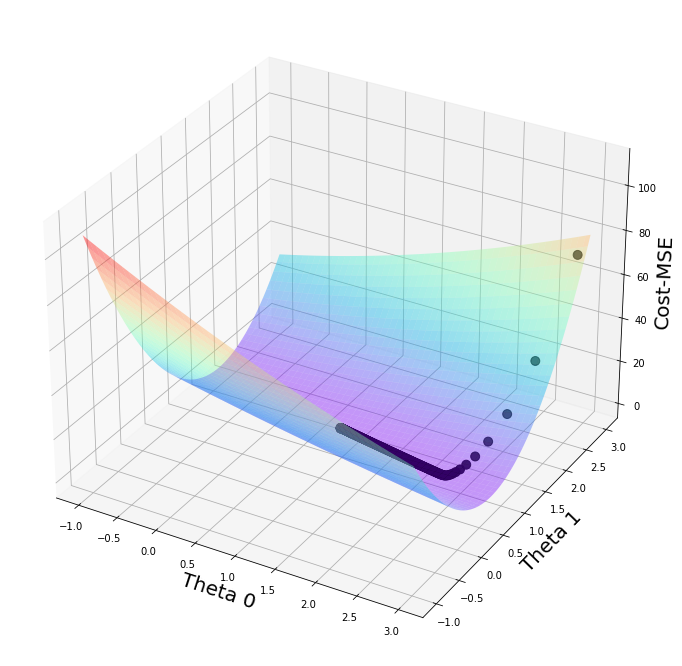

In [192]:
# Plotting MSE
fig = plt.figure(figsize = [16,12])
ax = fig.gca (projection ='3d')

ax.set_xlabel('Theta 0',fontsize = 20) 
ax.set_ylabel('Theta 1',fontsize = 20) 
ax.set_zlabel('Cost-MSE',fontsize = 20)

ax.scatter(plot_vals[:, 0],plot_vals[:, 1],mse_vals, s= 80, color='black')
ax.plot_surface(plot_t0,plot_t1,plot_cost,alpha= 0.4,cmap=cm.rainbow)
plt.show()